<a href="https://colab.research.google.com/github/Carlosrdz01/Proyecto-Final-Estad-stica/blob/main/Analisis_entrega_de_spares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# CARGA Y VISTA GENERAL DE LOS DATOS

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

directorio = '/content/drive/MyDrive/Colab/'
datos_spares = pd.read_excel(directorio+'Data/Proyecto/EntregaSpares.xlsx', sheet_name='Entrega Spare Parts')
datos_spares.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,NOMBRE,FECHA,TURNO,Motivo,CLIENTE,MAQUINA,MÓDULO,PART NUMBER,DESCRIPCION,QTY,COST UNI,COST,QUIEN LO ENTREGA
0,PABLO PEREZ,2023-01-02 00:00:00,A,PREVENTIVO,DEXCOM,DSD07,CONVEYOR,N953.75.23.105,BELT 2935 X 100 TYPE: TT 10E-HC,1.0,314.96,314.96,I. HARO
1,ANTONIO ESPARZA,2023-01-02 00:00:00,A,CORRECTIVO,DEXCOM,DSD02,CONVEYOR,188108,"CYLINDER, COMPACT ADVC-16-5-I-P-A",1.0,22.47,22.47,I. HARO
2,ANTONIO ESPARZA,2023-01-02 00:00:00,A,CORRECTIVO,DEXCOM,DSD02,CONVEYOR,S20.0108985.01,PLUNGER DEX-1911-05-00,1.0,38.86,38.86,I. HARO
3,MARIO URIBE,2023-01-02 00:00:00,B,PREVENTIVO,DEXCOM,CREST,4061,6637T61,"FILTRAFINE FILTER CARTRIDGE 10 MIC, 10""L, SOE,...",2.0,8.54,25.62,S. SOTO
4,MARIO URIBE,2023-01-02 00:00:00,B,PREVENTIVO,DEXCOM,CREST,4061,44095K31,FILTER CARTRIDGE,2.0,60.88,182.64,S. SOTO


<ipython-input-30-0054f73662f3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Motivo", data=datos_spares, palette="coolwarm", order=order)


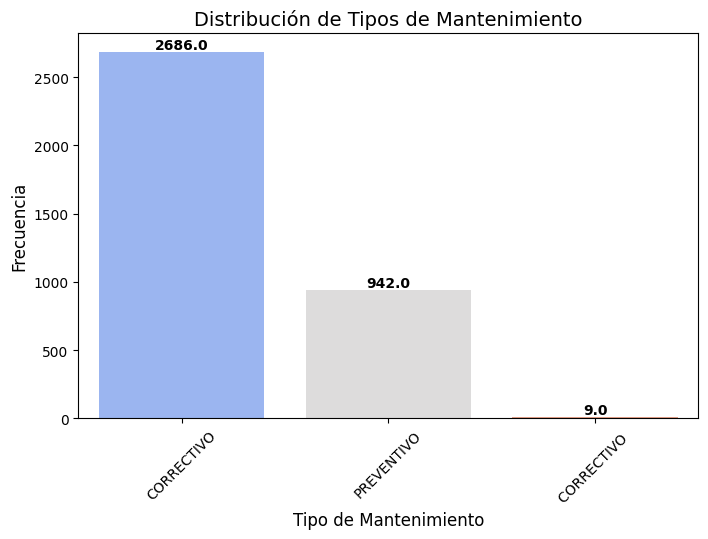

In [30]:
# TIPO DE MANTENIMIENTO: PREVENTIVO VS CORRECTIVO

# 1. Eliminar espacios en blanco en los nombres de las columnas y eliminar duplicados
datos_spares.columns = datos_spares.columns.str.strip()
datos_spares = datos_spares.loc[:, ~datos_spares.columns.duplicated()]

# 2. Verificar que la columna "Motivo" esté presente en los datos
if "Motivo" not in datos_spares.columns:
    raise ValueError("La columna 'Motivo' no existe en datos_spares. Verifica los datos.")

# 3. Ordenar las categorías por frecuencia
order = datos_spares["Motivo"].value_counts().index

# 4. Crear la figura
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Motivo", data=datos_spares, palette="coolwarm", order=order)

# 5. Agregar etiquetas de frecuencia sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', weight='bold')

# 6. Configurar títulos y etiquetas
plt.title("Distribución de Tipos de Mantenimiento", fontsize=14)
plt.xlabel("Tipo de Mantenimiento", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# 7. Mostrar el gráfico
plt.show()



-262.125 517.435 dsg


<ipython-input-31-d5f3f6c2c661>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


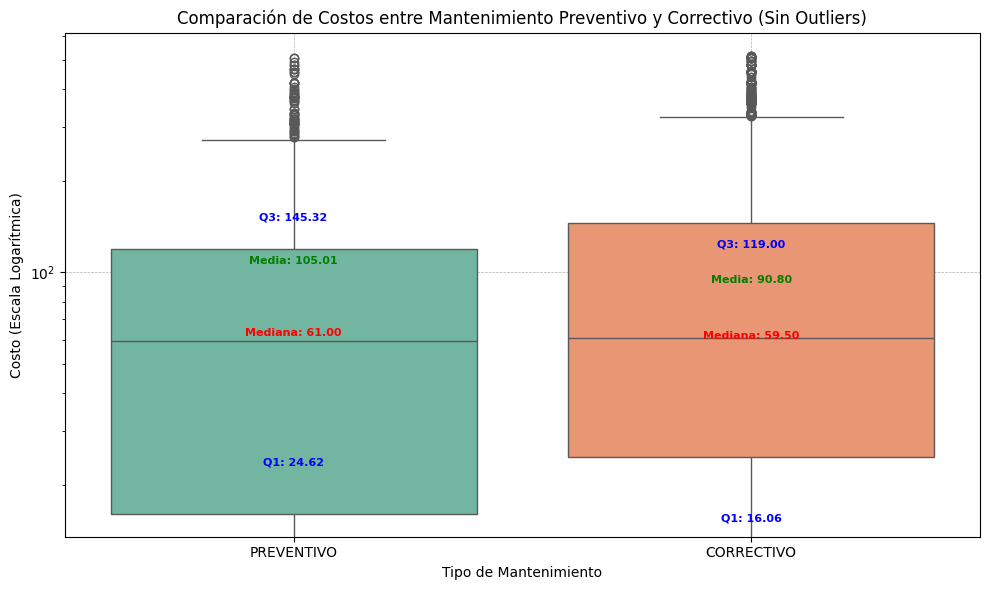

In [31]:

# 🛠️ 1. Asegurar que "COST" es numérico y eliminar valores nulos
datos_spares["COST"] = pd.to_numeric(datos_spares["COST"], errors='coerce')
datos_spares.dropna(subset=["COST"], inplace=True)

# 🛠️ 2. Asegurar que "Motivo" no tiene espacios extra y está en mayúsculas
datos_spares["Motivo"] = datos_spares["Motivo"].astype(str).str.strip().str.upper()

# 🛠️ 3. Calcular los límites para eliminar outliers usando el rango intercuartílico (IQR)
Q1 = datos_spares["COST"].quantile(0.25)
Q3 = datos_spares["COST"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para eliminar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(limite_inferior, limite_superior,"dsg")

# Filtrar los datos eliminando los outliers
datos_filtrados = datos_spares[(datos_spares["COST"] >= limite_inferior) & (datos_spares["COST"] <= limite_superior)]

# 🚨 Verificar si hay datos después del filtrado
if datos_filtrados.empty:
    print("⚠️ No hay datos después de eliminar outliers. Revisa los valores de COST.")
else:
    # 🛠️ 4. Crear el gráfico de caja y bigotes sin outliers
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(
        x="Motivo",
        y="COST",
        data=datos_filtrados,
        palette={"PREVENTIVO": "#66c2a5", "CORRECTIVO": "#fc8d62"}
    )

    # 🛠️ 5. Calcular estadísticas descriptivas sin outliers
    stats_mantenimiento_filtrado = datos_filtrados.groupby("Motivo")["COST"].describe()

    # 🛠️ 6. Agregar etiquetas con estadísticas en el gráfico
    for i, motivo in enumerate(stats_mantenimiento_filtrado.index):
        q1 = stats_mantenimiento_filtrado.loc[motivo, "25%"]
        median = stats_mantenimiento_filtrado.loc[motivo, "50%"]
        q3 = stats_mantenimiento_filtrado.loc[motivo, "75%"]
        mean_val = stats_mantenimiento_filtrado.loc[motivo, "mean"]

        # Agregar etiquetas sin sobreponer
        ax.text(i, q1, f'Q1: {q1:.2f}', ha='center', fontsize=8, color='blue', weight='bold', va='top')
        ax.text(i, median, f'Mediana: {median:.2f}', ha='center', fontsize=8, color='red', weight='bold', va='bottom')
        ax.text(i, q3, f'Q3: {q3:.2f}', ha='center', fontsize=8, color='blue', weight='bold', va='bottom')
        ax.text(i, mean_val, f'Media: {mean_val:.2f}', ha='center', fontsize=8, color='green', weight='bold', va='bottom')

    # 🛠️ 7. Aplicar escala logarítmica y mejorar etiquetas
    plt.yscale("log")
    plt.title("Comparación de Costos entre Mantenimiento Preventivo y Correctivo (Sin Outliers)")
    plt.xlabel("Tipo de Mantenimiento")
    plt.ylabel("Costo (Escala Logarítmica)")
    plt.xticks(rotation=0, fontsize=10)
    plt.grid(True, linestyle="--", linewidth=0.5)

    # Ajustar distribución de elementos
    plt.tight_layout()

    # 🛠️ 8. Mostrar la gráfica sin outliers
    plt.show()


Valores únicos en 'Motivo': ['PREVENTIVO' 'CORRECTIVO']


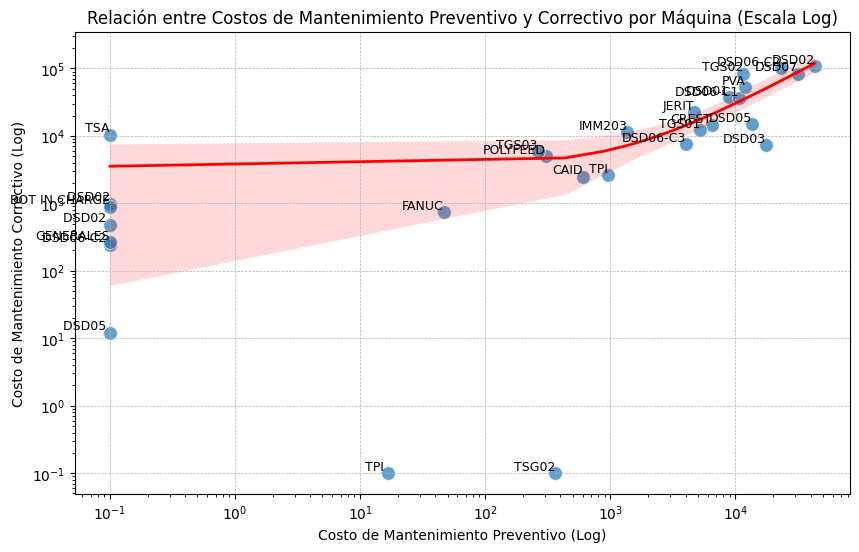

Covarianza entre costos preventivos y correctivos: 304334288.89
Coeficiente de correlación de Pearson: 0.87


In [32]:


# 1. Asegurar que "Motivo" no tenga espacios extra y esté en mayúsculas
datos_spares["Motivo"] = datos_spares["Motivo"].astype(str).str.strip().str.upper()

# Verificar valores únicos de "Motivo" para evitar errores en el pivot_table
print("Valores únicos en 'Motivo':", datos_spares["Motivo"].unique())

# 2. Asegurar que "COST" es numérico y eliminar valores nulos
datos_spares["COST"] = pd.to_numeric(datos_spares["COST"], errors='coerce')
datos_spares.dropna(subset=["COST"], inplace=True)

# 3. Sumar los costos de mantenimiento preventivo y correctivo por máquina
costos_mantenimiento = datos_spares.pivot_table(
    index="MAQUINA",
    columns="Motivo",
    values="COST",
    aggfunc="sum",
    fill_value=0
).reset_index()

# Verificar si hay datos después del pivot
if costos_mantenimiento.empty:
    print("No hay datos después del pivot. Revisa los valores de 'Motivo' y 'COST'.")
else:
    # 4. Renombrar columnas para que coincidan con el gráfico esperado
    costos_mantenimiento.columns.name = None
    costos_mantenimiento.rename(columns={"PREVENTIVO": "Costo Preventivo", "CORRECTIVO": "Costo Correctivo"}, inplace=True)

    # 5. Reemplazar valores 0 con 0.1 para evitar errores en escala logarítmica
    costos_mantenimiento["Costo Preventivo"] = costos_mantenimiento["Costo Preventivo"].replace(0, 0.1)
    costos_mantenimiento["Costo Correctivo"] = costos_mantenimiento["Costo Correctivo"].replace(0, 0.1)

    # 6. Crear gráfico de dispersión
    plt.figure(figsize=(10, 6))

    scatter = sns.scatterplot(
        x=costos_mantenimiento["Costo Preventivo"],
        y=costos_mantenimiento["Costo Correctivo"],
        alpha=0.7,
        s=100
    )

    # Agregar etiquetas a los puntos
    for i, row in costos_mantenimiento.iterrows():
        plt.text(row["Costo Preventivo"], row["Costo Correctivo"], row["MAQUINA"], fontsize=9, ha="right", va="bottom")

    # Aplicar escala logarítmica en ambos ejes
    plt.xscale("log")
    plt.yscale("log")

    # Agregar línea de tendencia con regresión lineal
    sns.regplot(
        x=costos_mantenimiento["Costo Preventivo"],
        y=costos_mantenimiento["Costo Correctivo"],
        scatter=False,
        color="red",
        line_kws={"linewidth": 2}
    )

    # Configuración del gráfico mejorada
    plt.title("Relación entre Costos de Mantenimiento Preventivo y Correctivo por Máquina (Escala Log)")
    plt.xlabel("Costo de Mantenimiento Preventivo (Log)")
    plt.ylabel("Costo de Mantenimiento Correctivo (Log)")
    plt.grid(True, linestyle="--", linewidth=0.5)

    # Mostrar el gráfico
    plt.show()

    # 7. Calcular la covarianza entre costos preventivos y correctivos
    covarianza = costos_mantenimiento["Costo Preventivo"].cov(costos_mantenimiento["Costo Correctivo"])

    # 8. Calcular el coeficiente de correlación de Pearson
    correlacion = costos_mantenimiento["Costo Preventivo"].corr(costos_mantenimiento["Costo Correctivo"])

    # Mostrar los resultados
    print(f"Covarianza entre costos preventivos y correctivos: {covarianza:.2f}")
    print(f"Coeficiente de correlación de Pearson: {correlacion:.2f}")


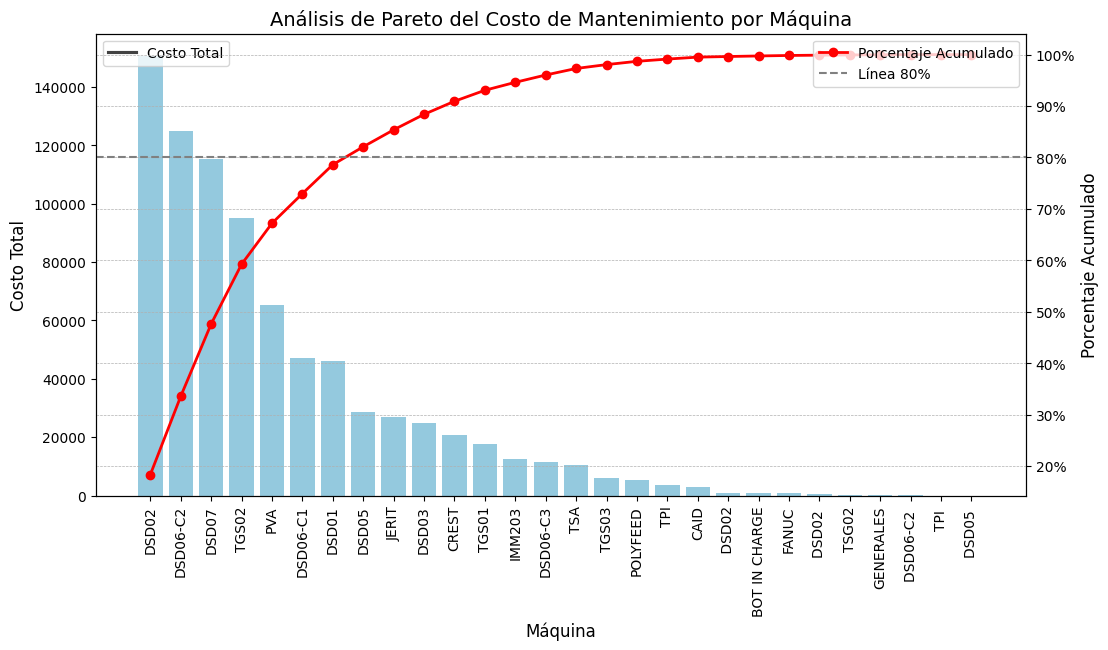

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔹 2. Ordenar datos de mayor a menor costo total por máquina
df_pareto = datos_spares.groupby("MAQUINA")["COST"].sum().reset_index()
df_pareto = df_pareto.sort_values(by="COST", ascending=False)

# 🔹 3. Calcular porcentaje acumulado
df_pareto["% Acumulado"] = df_pareto["COST"].cumsum() / df_pareto["COST"].sum() * 100

# 🔹 4. Crear gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# 🔹 5. Gráfico de barras para costos por máquina
sns.barplot(x="MAQUINA", y="COST", data=df_pareto, ax=ax1, color="skyblue")

# Configuración del eje de costos
ax1.set_ylabel("Costo Total", fontsize=12)
ax1.set_xlabel("Máquina", fontsize=12)
ax1.set_title("Análisis de Pareto del Costo de Mantenimiento por Máquina", fontsize=14)
ax1.tick_params(axis="x", rotation=90)

# 🔹 6. Crear eje secundario para % acumulado
ax2 = ax1.twinx()
ax2.plot(df_pareto["MAQUINA"], df_pareto["% Acumulado"], color="red", marker="o", linestyle="-", linewidth=2, label="Porcentaje Acumulado")

# Configuración del eje de porcentaje acumulado
ax2.set_ylabel("Porcentaje Acumulado", fontsize=12)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f}%"))

# 🔹 7. Línea del 80%
ax2.axhline(80, color="gray", linestyle="--", linewidth=1.5, label="Línea 80%")

# 🔹 8. Mostrar gráfico con leyenda
ax1.legend(["Costo Total"], loc="upper left")
ax2.legend(["Porcentaje Acumulado", "Línea 80%"], loc="upper right")

plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()


Números de parte que representan el 80% del costo total:
                 PART NUMBER                                                                                            DESCRIPCION         COST  % Acumulado
              B30.2041718.00                                                                        TOOL: MANDREL, TUNGSTEN CARBIDE 64296.900000     7.836198
                     PV-27SC                                                                SMOOTH FLOW NOZZLE, 27 GAUGE, CORE ONLY 44858.740000    13.303365
              B92.2036403.00                                                                                   PALLET, BASE : DSD03 19632.860000    15.696124
                     7361401                                                                           KIT V XQR41 PISTON - CUP END 18016.250000    17.891858
                    44095K31          Filter Cartridge for Rust, Particles and Sediment for Water with O-Ring, 10" High, 0.2 Micron 16874.620000    19.9

<ipython-input-34-8dda4ef9b33e>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_pareto_data["PART NUMBER"], rotation=90)


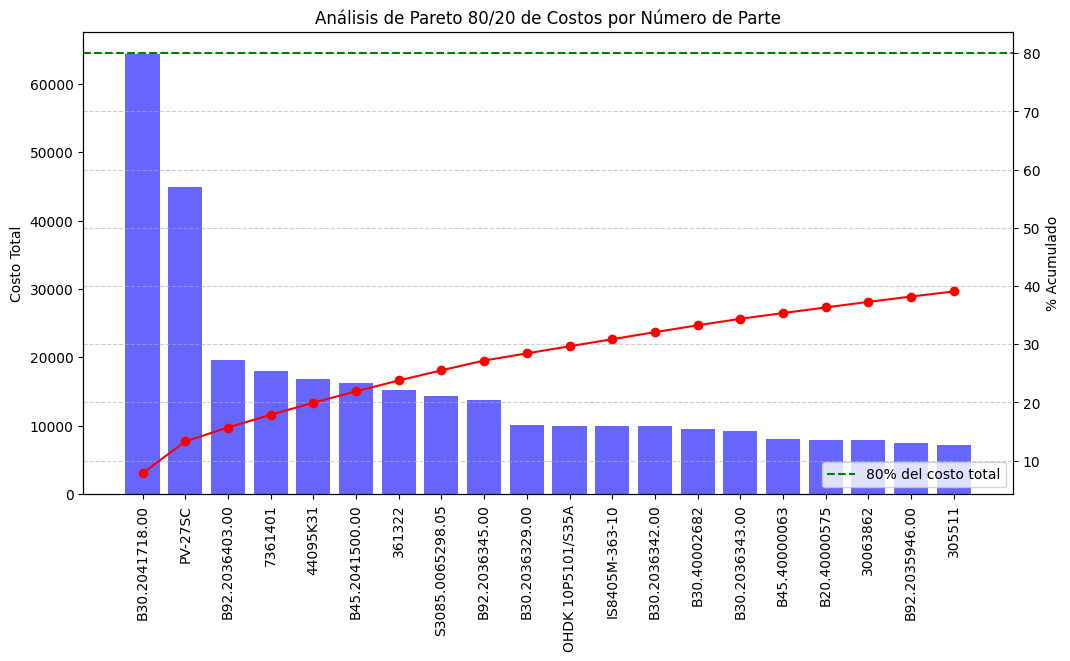

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que "COST" sea numérico
datos_spares["COST"] = pd.to_numeric(datos_spares["COST"], errors='coerce')
datos_spares.dropna(subset=["COST"], inplace=True)

# Asegurar que "PART NUMBER" y "DESCRIPCION" sean strings
datos_spares["PART NUMBER"] = datos_spares["PART NUMBER"].astype(str)
datos_spares["DESCRIPCION"] = datos_spares["DESCRIPCION"].astype(str)

# Sumar el costo total por número de parte y agregar la descripción
pareto_data = datos_spares.groupby(["PART NUMBER", "DESCRIPCION"])["COST"].sum().reset_index()

# Ordenar de mayor a menor por costo total
pareto_data = pareto_data.sort_values(by="COST", ascending=False)

# Calcular la contribución acumulada al costo total
pareto_data["% Acumulado"] = pareto_data["COST"].cumsum() / pareto_data["COST"].sum() * 100

# Identificar los números de parte que representan el 80% del costo total
pareto_80 = pareto_data[pareto_data["% Acumulado"] <= 80]

# Mostrar los números de parte clave con su descripción en formato tabla
print("\nNúmeros de parte que representan el 80% del costo total:")
print(pareto_80.to_string(index=False))  # Mostrar sin índice

# Seleccionar solo los primeros 20 números de parte más costosos para el gráfico
top_pareto_data = pareto_data.head(20)

# Gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de barras para costos individuales (solo los top 20)
ax1.bar(top_pareto_data["PART NUMBER"], top_pareto_data["COST"], color="blue", alpha=0.6)
ax1.set_ylabel("Costo Total")
ax1.set_xticklabels(top_pareto_data["PART NUMBER"], rotation=90)

# Línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(top_pareto_data["PART NUMBER"], top_pareto_data["% Acumulado"], color="red", marker="o", linestyle="-")
ax2.set_ylabel("% Acumulado")

# Línea de referencia del 80%
ax2.axhline(80, color="green", linestyle="--", label="80% del costo total")
ax2.legend()

plt.title("Análisis de Pareto 80/20 de Costos por Número de Parte")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



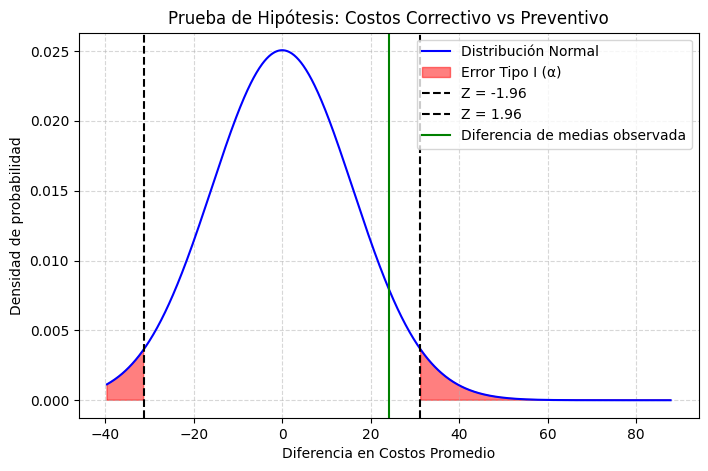

In [35]:
# Reintentar el análisis de hipótesis ahora que los datos están disponibles

import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# Asegurar que la columna COST sea numérica
datos_spares["COST"] = pd.to_numeric(datos_spares["COST"], errors='coerce')
datos_spares.dropna(subset=["COST"], inplace=True)

# Separar los costos en función del tipo de mantenimiento
costos_correctivo = datos_spares[datos_spares["Motivo"] == "CORRECTIVO"]["COST"]
costos_preventivo = datos_spares[datos_spares["Motivo"] == "PREVENTIVO"]["COST"]

# Calcular medias y desviaciones estándar
media_correctivo = np.mean(costos_correctivo)
media_preventivo = np.mean(costos_preventivo)
std_correctivo = np.std(costos_correctivo, ddof=1)
std_preventivo = np.std(costos_preventivo, ddof=1)

# Definir la diferencia de medias
diferencia_medias = media_correctivo - media_preventivo

# Tamaños de muestra
n_correctivo = len(costos_correctivo)
n_preventivo = len(costos_preventivo)

# Calcular el error estándar
error_estandar = np.sqrt((std_correctivo**2 / n_correctivo) + (std_preventivo**2 / n_preventivo))

# Definir el intervalo de rechazo para una prueba bilateral
alpha = 0.05  # Nivel de significancia
z_critico = stats.norm.ppf(1 - alpha / 2)  # Valor crítico para una prueba bilateral
limite_inferior = 0 - z_critico * error_estandar
limite_superior = 0 + z_critico * error_estandar

# Crear la distribución normal centrada en la hipótesis nula (diferencia de medias = 0)
z = np.linspace(diferencia_medias - 4 * error_estandar, diferencia_medias + 4 * error_estandar, 1000)
pdf = stats.norm.pdf(z, 0, error_estandar)

# Graficar la distribución normal con las áreas de rechazo
plt.figure(figsize=(8, 5))
plt.plot(z, pdf, 'b', label="Distribución Normal")

# Sombrear las áreas de rechazo (Error Tipo I)
plt.fill_between(z, pdf, where=(z <= limite_inferior) | (z >= limite_superior), color='red', alpha=0.5, label="Error Tipo I (α)")

# Marcar los valores críticos
plt.axvline(limite_inferior, color='black', linestyle='--', label=f"Z = {-z_critico:.2f}")
plt.axvline(limite_superior, color='black', linestyle='--', label=f"Z = {z_critico:.2f}")
plt.axvline(diferencia_medias, color='green', linestyle='-', label="Diferencia de medias observada")

# Etiquetas y leyenda
plt.title("Prueba de Hipótesis: Costos Correctivo vs Preventivo")
plt.xlabel("Diferencia en Costos Promedio")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Mostrar la gráfica
plt.show()


In [36]:
import pandas as pd
import numpy as np

# Convertir la columna de fechas a tipo datetime
datos_spares["FECHA"] = pd.to_datetime(datos_spares["FECHA"], errors='coerce')

# Filtrar solo los registros de mantenimiento correctivo
datos_correctivos = datos_spares[datos_spares["Motivo"] == "CORRECTIVO"]

# Lista para almacenar resultados de MTBF
mtbf_results = []

# Calcular MTBF para cada máquina
for maquina in datos_correctivos["MAQUINA"].unique():
    datos_filtro = datos_correctivos[datos_correctivos["MAQUINA"] == maquina].copy()
    datos_filtro = datos_filtro.sort_values(by="FECHA")

    if len(datos_filtro) > 1:  # Se requiere al menos dos fallas para calcular MTBF
        datos_filtro["Time_Diff"] = datos_filtro["FECHA"].diff().dt.days
        mtbf_value = datos_filtro["Time_Diff"].mean()
    else:
        mtbf_value = np.nan  # No se puede calcular MTBF con una sola falla

    mtbf_results.append({"Máquina": maquina, "MTBF (días)": mtbf_value if pd.notna(mtbf_value) else np.nan})

# Convertir a DataFrame y ordenar de menor a mayor
df_mtbf = pd.DataFrame(mtbf_results)
df_mtbf["MTBF (días)"] = pd.to_numeric(df_mtbf["MTBF (días)"], errors='coerce')
df_mtbf_sorted = df_mtbf.sort_values(by="MTBF (días)", ascending=True)

# Mostrar la tabla ordenada
print(df_mtbf_sorted)


          Máquina  MTBF (días)
22          DSD02     0.000000
2        DSD06-C2     1.716346
6             PVA     1.831382
4           DSD07     2.354740
0           DSD02     2.413793
1           CREST     2.906504
24            TSA     3.142857
5           TGS02     4.042328
3           JERIT     4.591716
21          DSD05     5.295455
10       DSD06-C1     5.300699
9           DSD01     7.560000
23  BOT IN CHARGE    10.272727
8          IMM203    11.090909
7           TGS01    12.180328
14            TPI    17.384615
12           CAID    20.074074
11       DSD06-C3    22.423077
18          FANUC    31.500000
15       POLYFEED    38.769231
13          DSD03    39.812500
17          TGS03    46.700000
19      GENERALES    81.600000
16      DSD06-C2           NaN
20         DSD02           NaN
25         DSD05           NaN


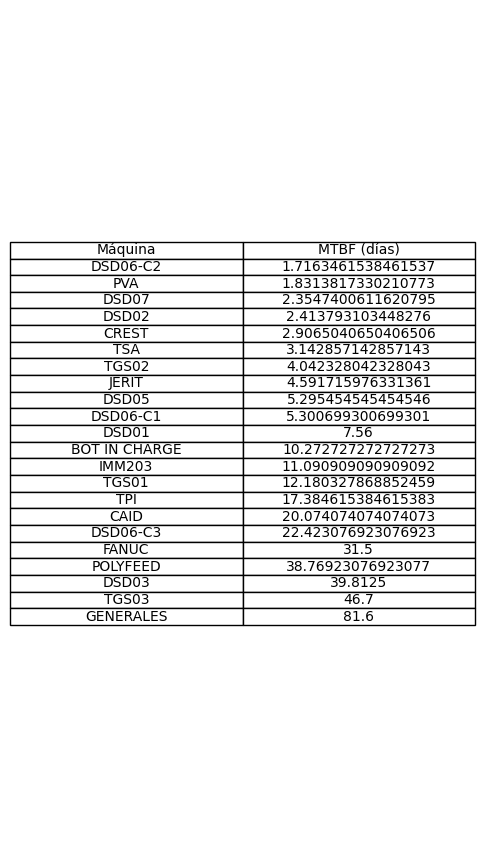

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir la columna de fechas a tipo datetime
datos_spares["FECHA"] = pd.to_datetime(datos_spares["FECHA"], errors='coerce')

# Filtrar solo los registros de mantenimiento correctivo
datos_correctivos = datos_spares[datos_spares["Motivo"] == "CORRECTIVO"]

# Lista para almacenar resultados de MTBF
mtbf_results = []

# Calcular MTBF para cada máquina
for maquina in datos_correctivos["MAQUINA"].unique():
    datos_filtro = datos_correctivos[datos_correctivos["MAQUINA"] == maquina].copy()
    datos_filtro = datos_filtro.sort_values(by="FECHA")

    if len(datos_filtro) > 1:  # Se requiere al menos dos fallas para calcular MTBF
        datos_filtro["Time_Diff"] = datos_filtro["FECHA"].diff().dt.days
        mtbf_value = datos_filtro["Time_Diff"].mean()
    else:
        mtbf_value = np.nan  # No se puede calcular MTBF con una sola falla

    mtbf_results.append({"Máquina": maquina, "MTBF (días)": mtbf_value if pd.notna(mtbf_value) and mtbf_value > 0 else np.nan})

# Convertir a DataFrame y ordenar de menor a mayor, eliminando valores NaN y 0
df_mtbf = pd.DataFrame(mtbf_results)
df_mtbf["MTBF (días)"] = pd.to_numeric(df_mtbf["MTBF (días)"], errors='coerce')

# Filtrar valores que no sean NaN ni 0
df_mtbf_filtered = df_mtbf.dropna()
df_mtbf_filtered = df_mtbf_filtered[df_mtbf_filtered["MTBF (días)"] > 0]

# Ordenar de menor a mayor
df_mtbf_sorted = df_mtbf_filtered.sort_values(by="MTBF (días)", ascending=True)

# Mostrar la tabla en un formato visual solo si hay datos
if not df_mtbf_sorted.empty:
    fig, ax = plt.subplots(figsize=(6, len(df_mtbf_sorted) * 0.5))
    ax.axis("tight")
    ax.axis("off")
    ax.table(cellText=df_mtbf_sorted.values, colLabels=df_mtbf_sorted.columns, cellLoc="center", loc="center")

    # Mostrar la tabla
    plt.show()
else:
    print("No hay datos válidos para mostrar en la gráfica.")


In [38]:
import pandas as pd
import numpy as np

# Filtrar solo las máquinas especificadas
maquinas_interes = ["DSD06-C2", "PVA", "DSD07", "DSD02", "TGS02", "DSD06-C1", "DSD01"]
datos_filtrados = datos_spares[datos_spares["MAQUINA"].isin(maquinas_interes)].copy()

# Asegurar que la columna de fecha sea tipo datetime
datos_filtrados["FECHA"] = pd.to_datetime(datos_filtrados["FECHA"], errors='coerce')

# Contar cuántas veces se ha cambiado cada repuesto en cada máquina y calcular el costo total
spare_counts = datos_filtrados.groupby(["MAQUINA", "PART NUMBER"]).agg(
    Cantidad_Cambios=("FECHA", "count"),
    Costo_Total=("COST", "sum")
).reset_index()

# Seleccionar los 5 repuestos más cambiados por cada máquina usando group_keys=False
top_spares_per_machine = (
    spare_counts.groupby("MAQUINA", group_keys=False)
    .apply(lambda x: x.nlargest(10, "Cantidad_Cambios"))
)

# Calcular la frecuencia de cambio de cada repuesto en cada máquina
frecuencia_cambio = datos_filtrados.groupby(["MAQUINA", "PART NUMBER"]).agg(
    Fecha_Primera=("FECHA", "min"),
    Fecha_Última=("FECHA", "max"),
    Cantidad_Cambios=("FECHA", "count")
).reset_index()

frecuencia_cambio["Días de Uso"] = (frecuencia_cambio["Fecha_Última"] - frecuencia_cambio["Fecha_Primera"]).dt.days
frecuencia_cambio["Frecuencia de Cambio (días)"] = frecuencia_cambio["Días de Uso"] / (frecuencia_cambio["Cantidad_Cambios"] - 1)

# Unir ambas tablas para obtener los 5 repuestos más cambiados, su frecuencia de cambio y costo total
top_spares_frecuencia = pd.merge(top_spares_per_machine, frecuencia_cambio, on=["MAQUINA", "PART NUMBER"], how="left")

# Eliminar valores NaN e infinitos que pueden generarse en la frecuencia de cambio
top_spares_frecuencia = top_spares_frecuencia.replace([np.inf, -np.inf], pd.NA).dropna(subset=["Frecuencia de Cambio (días)"])

# Ruta para guardar el archivo Excel
directorio = '/content/drive/MyDrive/Colab/'
ruta_salida = directorio + "Top_5_SpareParts_Por_Maquina.xlsx"

# Guardar el DataFrame en Excel con el motor "openpyxl"
top_spares_frecuencia.to_excel(ruta_salida, index=False, engine="openpyxl")

# Mostrar la ruta del archivo generado
print(f"Archivo generado: {ruta_salida}")


Archivo generado: /content/drive/MyDrive/Colab/Top_5_SpareParts_Por_Maquina.xlsx


<ipython-input-38-210ae4107f96>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "Cantidad_Cambios"))


In [39]:
from scipy.stats import ttest_ind

# Separar en dos grupos: Máquinas con alto y bajo costo preventivo
umbral = costos_mantenimiento["Costo Preventivo"].median()
grupo_alto = costos_mantenimiento[costos_mantenimiento["Costo Preventivo"] >= umbral]["Costo Correctivo"]
grupo_bajo = costos_mantenimiento[costos_mantenimiento["Costo Preventivo"] < umbral]["Costo Correctivo"]

# Prueba de hipótesis t-test
stat, p_value = ttest_ind(grupo_alto, grupo_bajo, equal_var=False)

# Mostrar resultados
print(f"Estadístico de prueba: {stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del p-value
if p_value < 0.05:
    print("Hay evidencia estadística de que el costo preventivo afecta los correctivos.")
else:
    print("No hay suficiente evidencia para afirmar que el costo preventivo afecta los correctivos.")


Estadístico de prueba: 4.08
Valor p: 0.0013
Hay evidencia estadística de que el costo preventivo afecta los correctivos.
